In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score



In [2]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Specify the dataset you want to download
dataset_name = 'rouseguy/bankbalanced'

# Downloading the dataset
api.dataset_download_files(dataset_name, path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rouseguy/bankbalanced


In [3]:
# Load the dataset 
df = pd.read_csv('bank.csv', delimiter=',')
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.shape

(11162, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Data Cleaning and Explaratory Data Analysis(EDA)

In [9]:
# Checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
# Checking for duplicate values
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
# Summary of descriptive statistics for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
# Summary of descriptive statistics for categorical columns
df.describe(include= "O").T


,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


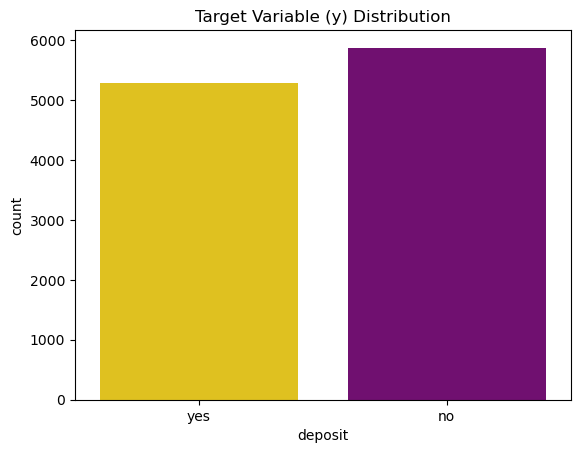

In [14]:
# Target Variable Distribution
custom_palette = {"yes": "#FFD700", "no": "#800080"}
sns.countplot(x='deposit', data=df, palette=custom_palette)
plt.title("Target Variable (y) Distribution")
plt.show()

#### Numerical Variables

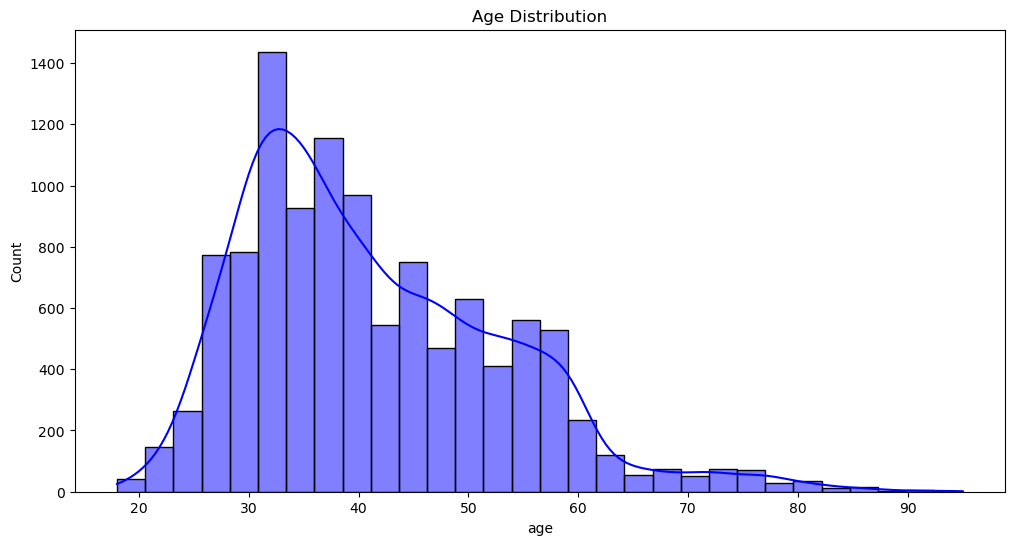

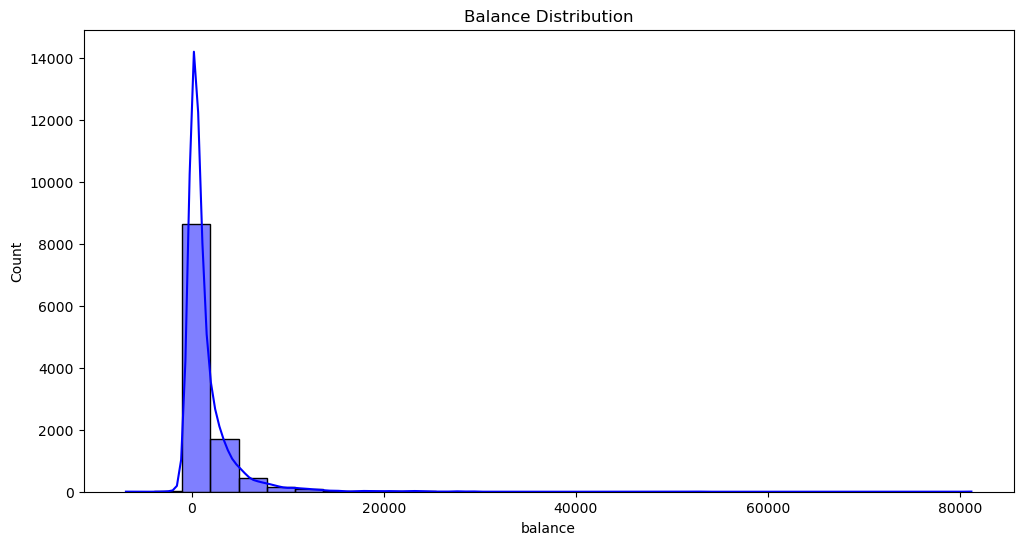

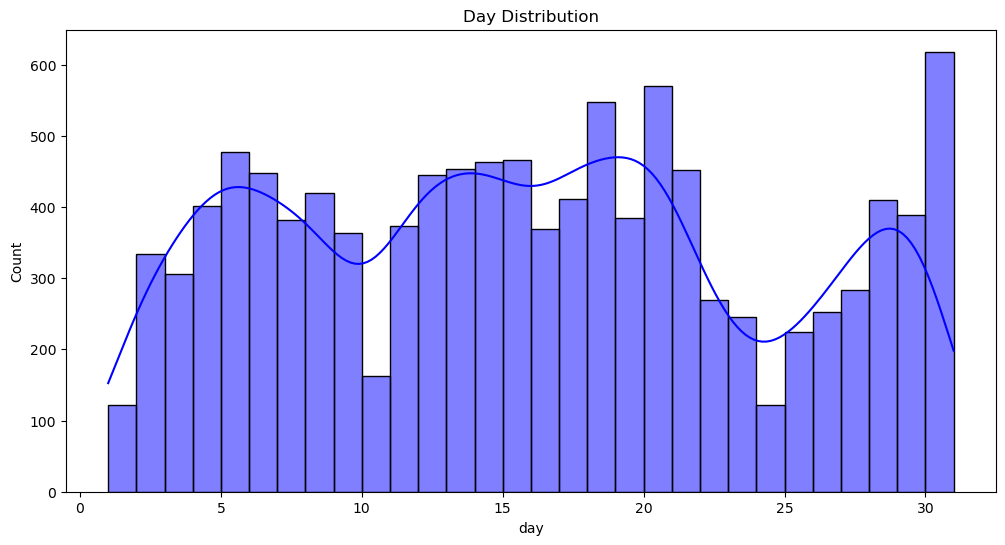

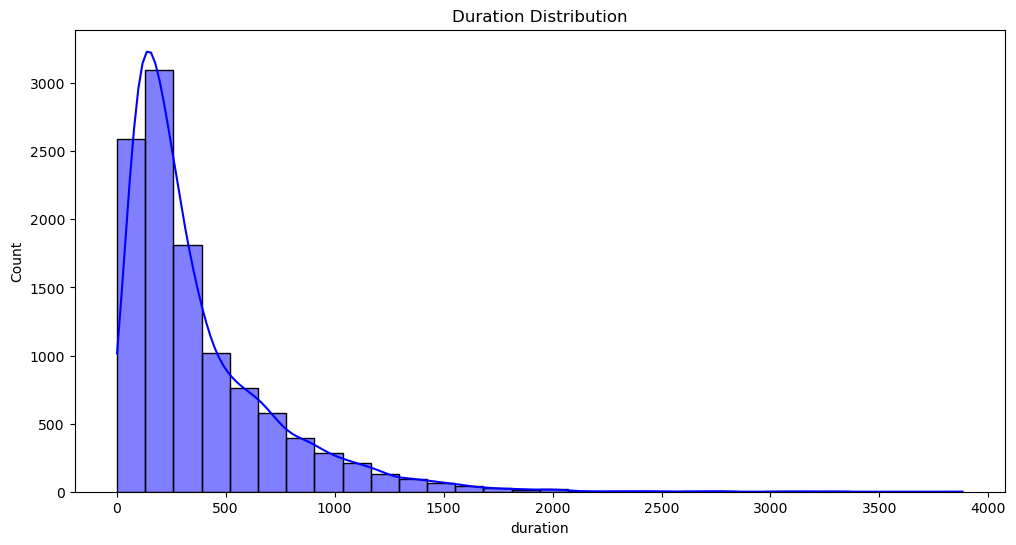

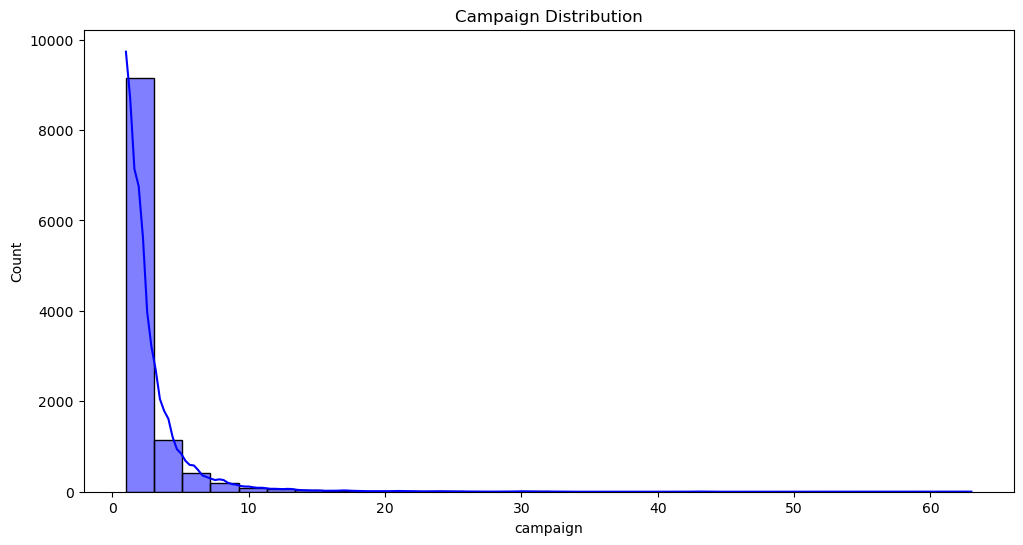

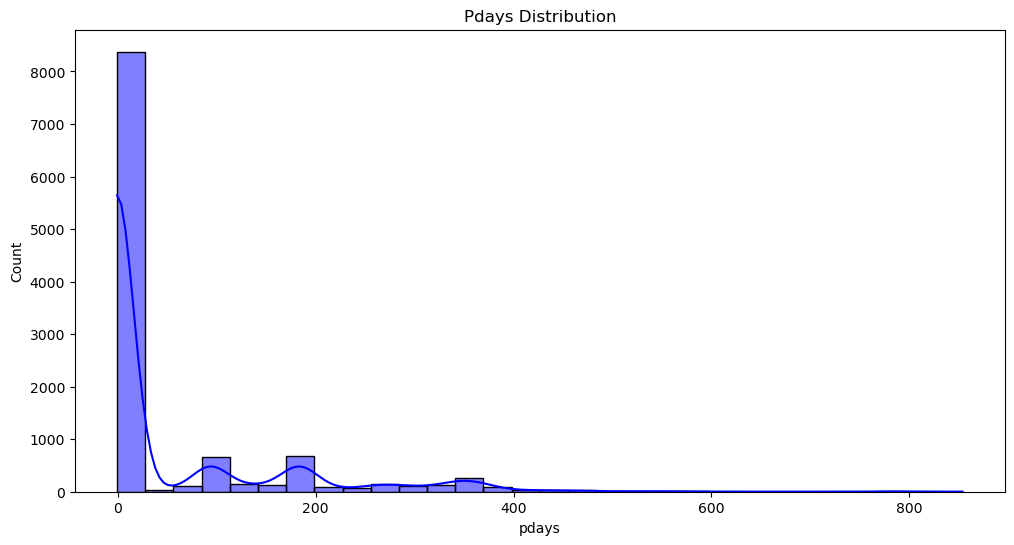

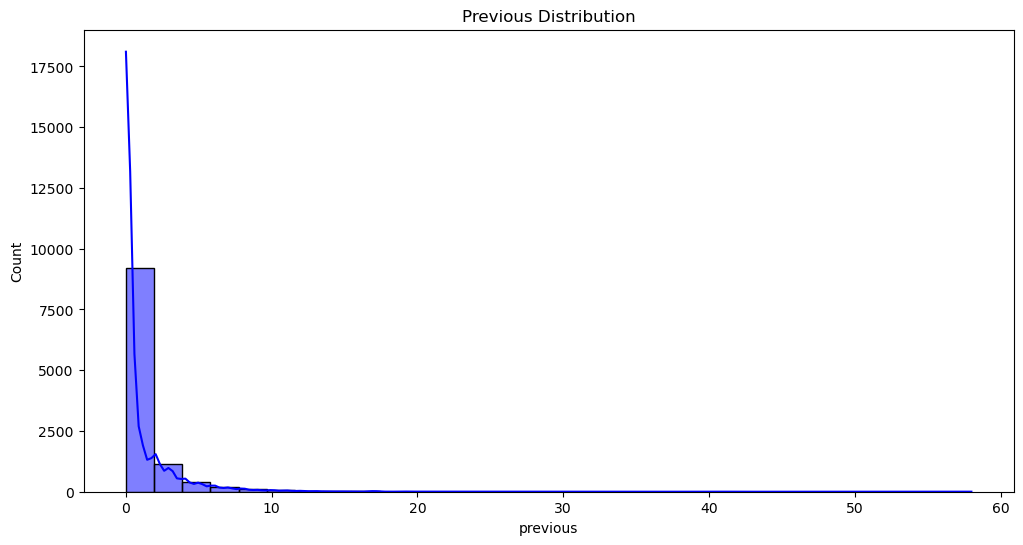

In [16]:
# Numerical_variables distributions
numerical_variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for feature in numerical_variables:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f"{feature.capitalize()} Distribution")
    plt.show()


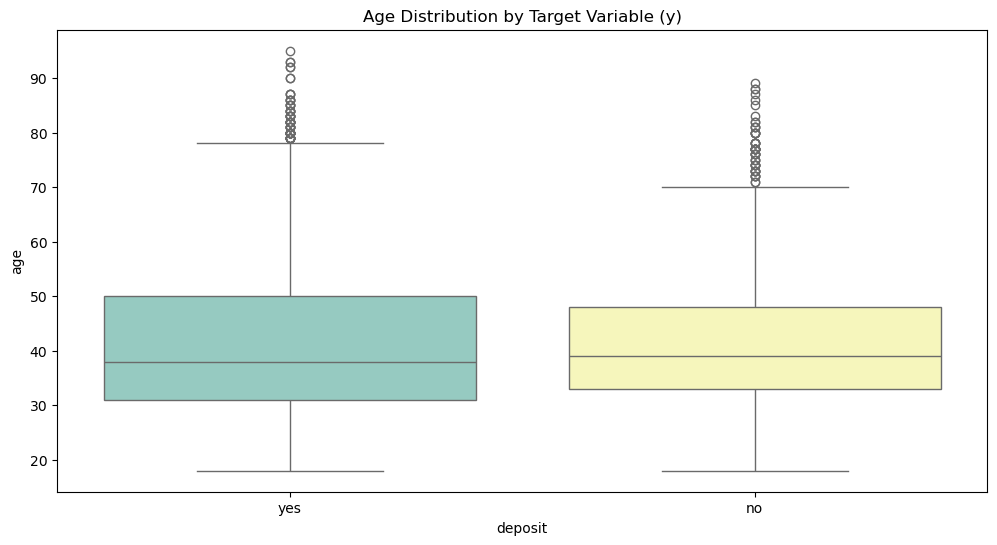

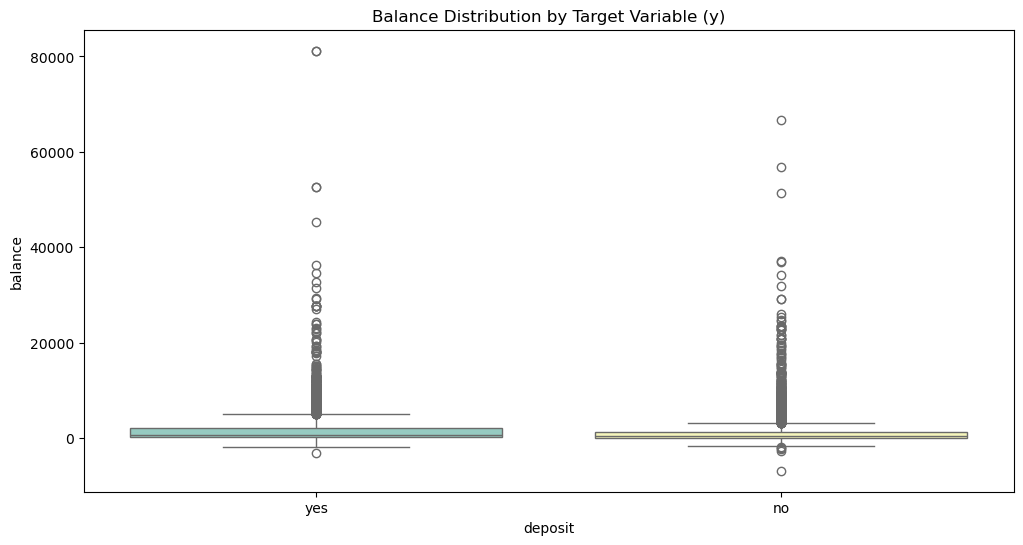

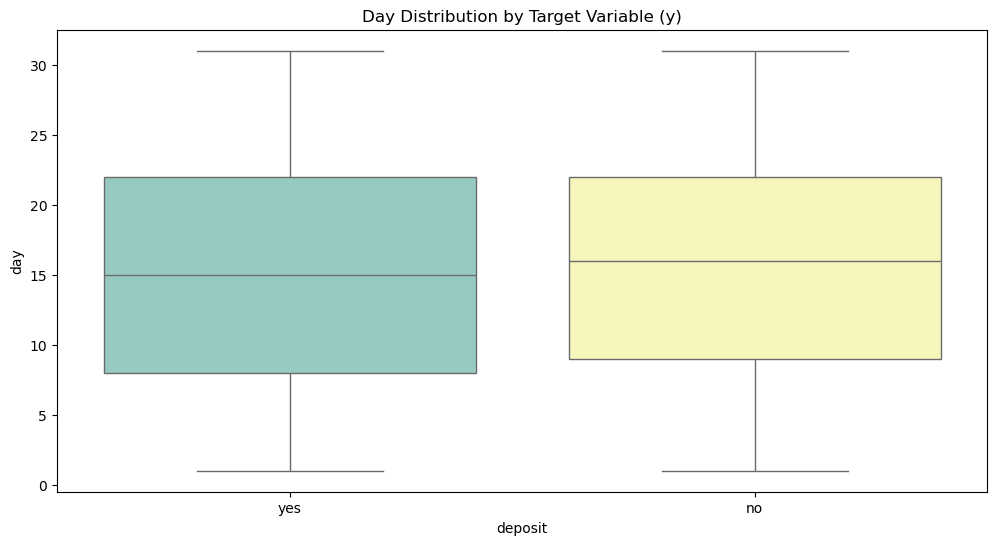

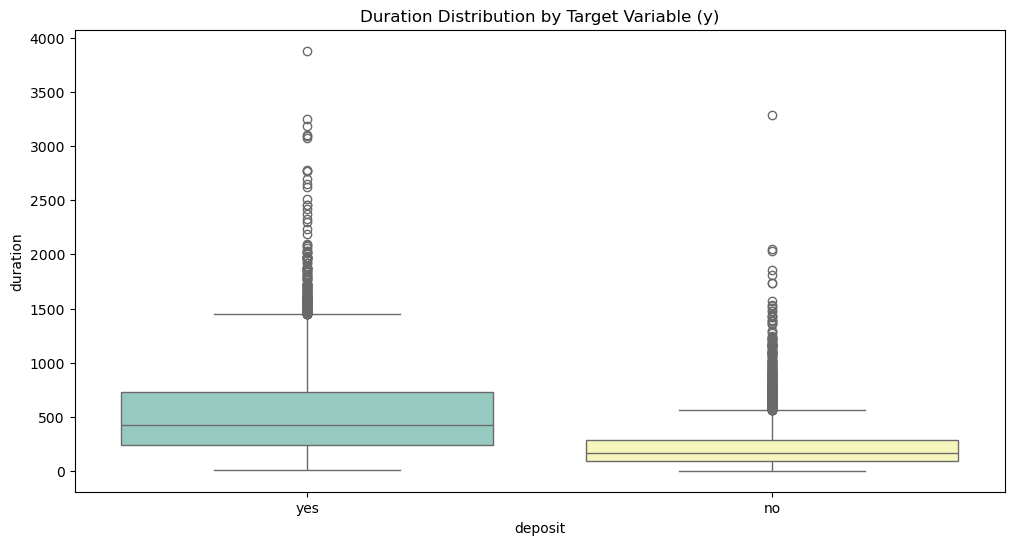

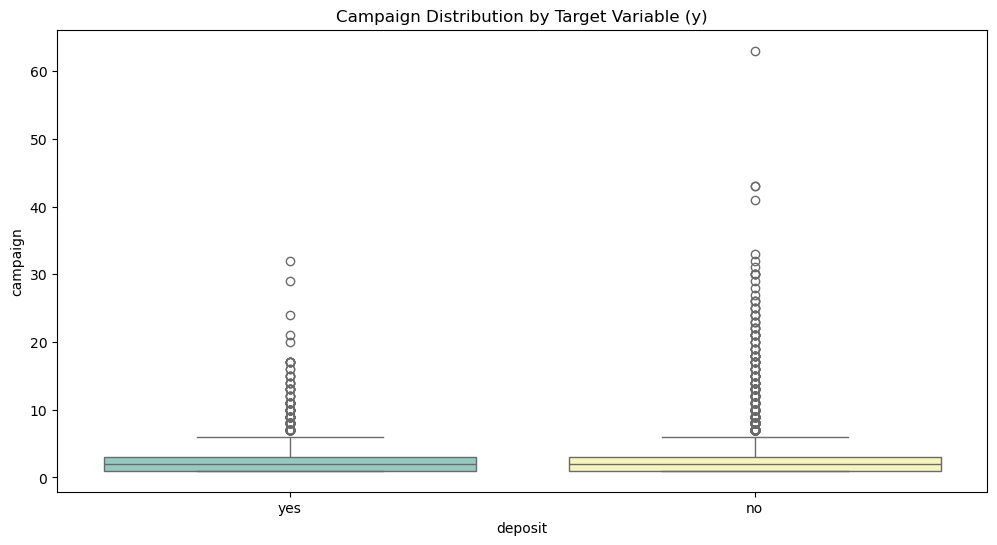

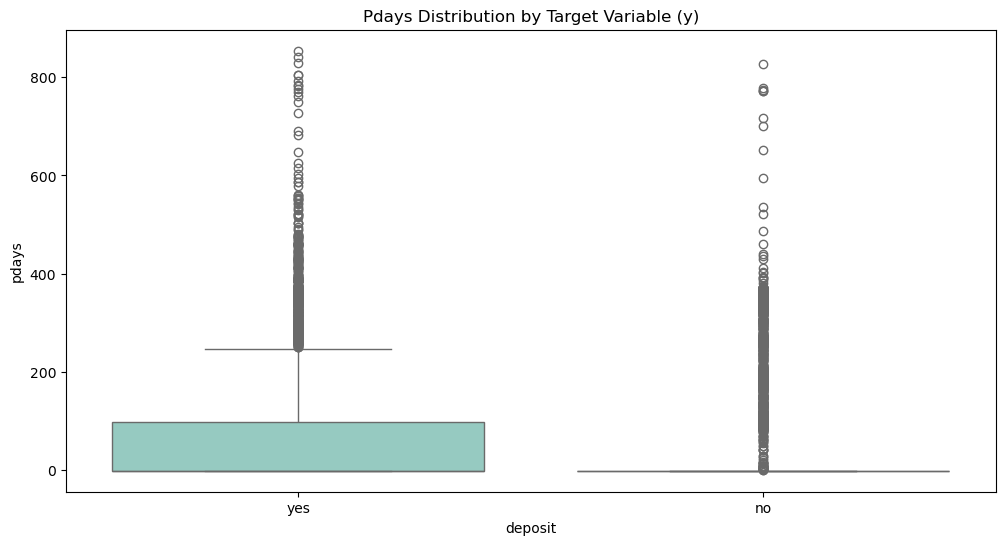

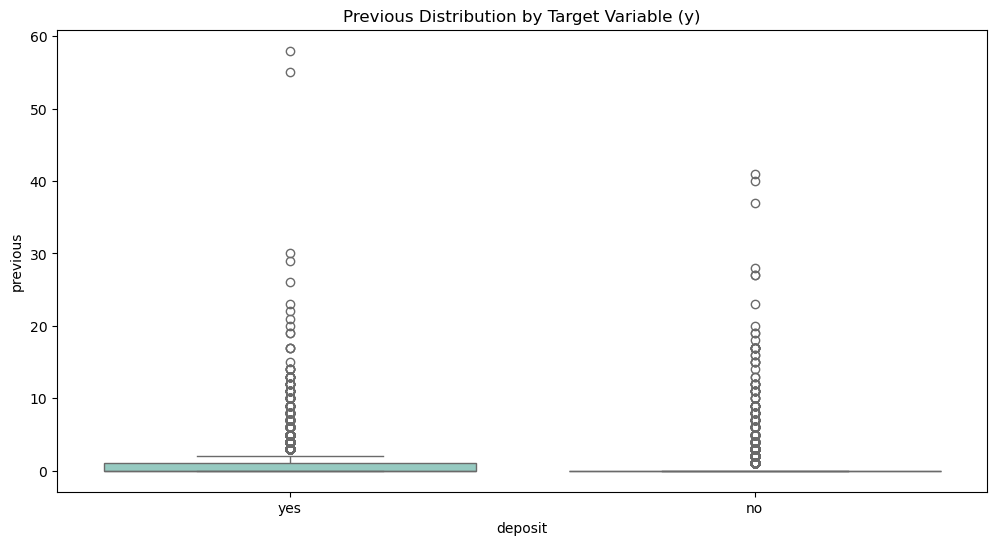

In [17]:
# Numerical_variables vs y
for feature in numerical_variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='deposit', y=feature, data=df, palette='Set3')
    plt.title(f"{feature.capitalize()} Distribution by Target Variable (y)")
    plt.show()


#### Categorical Variables

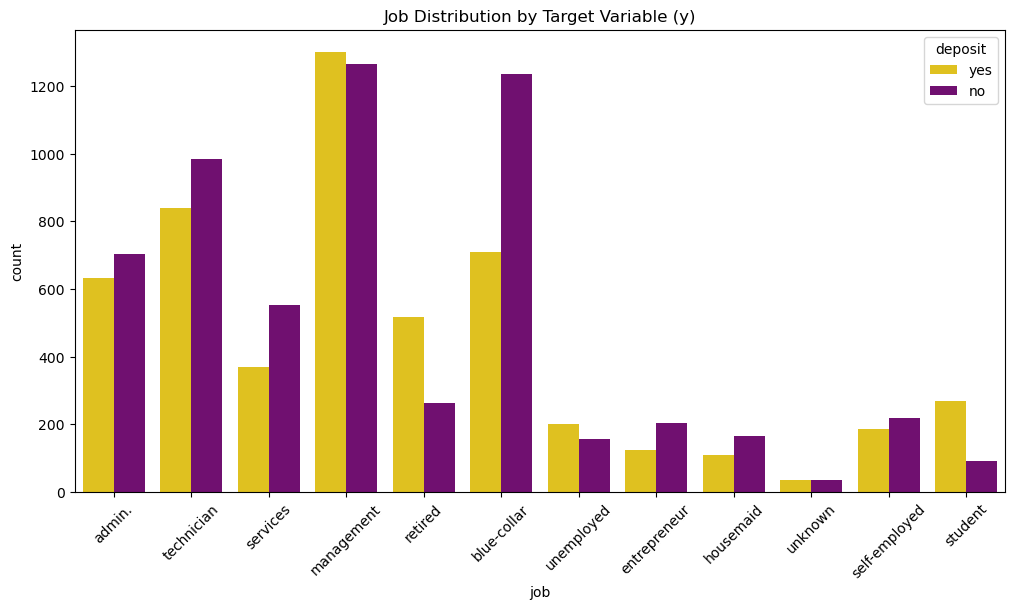

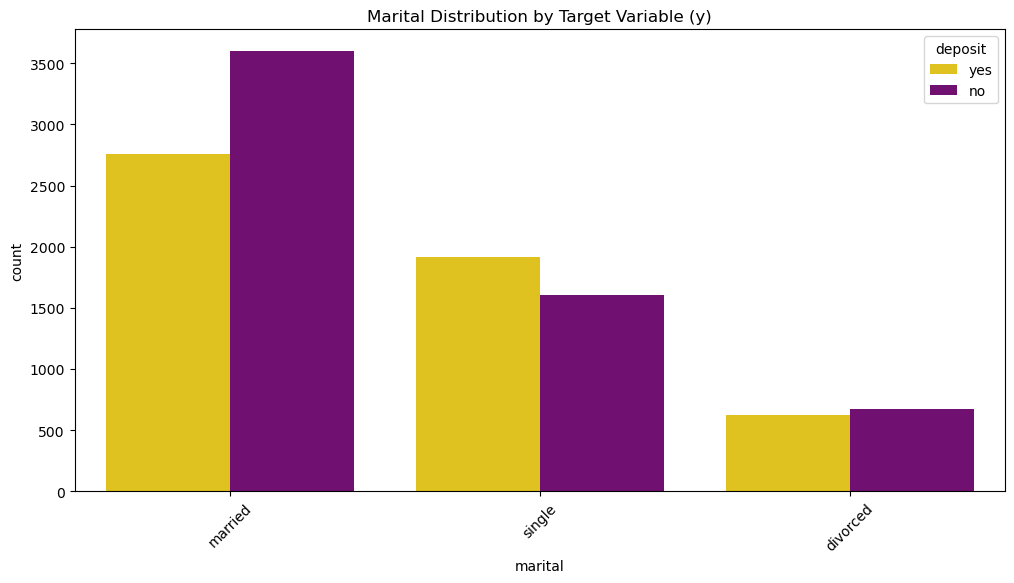

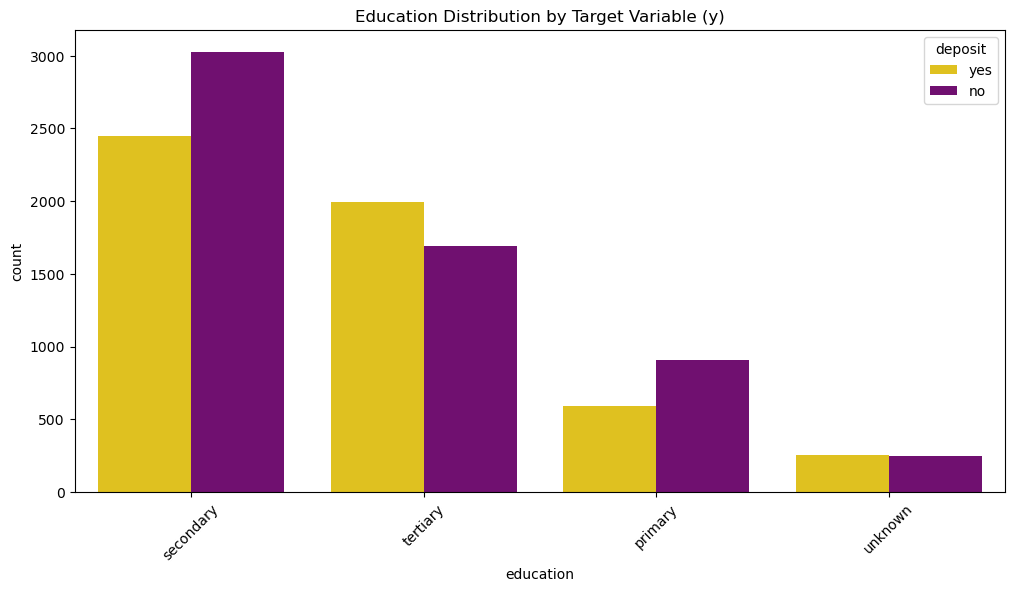

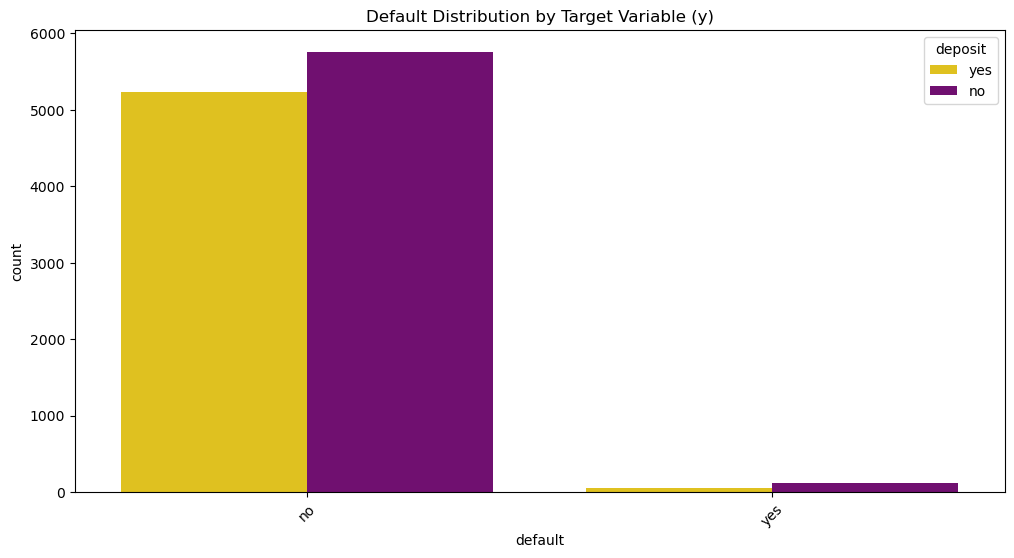

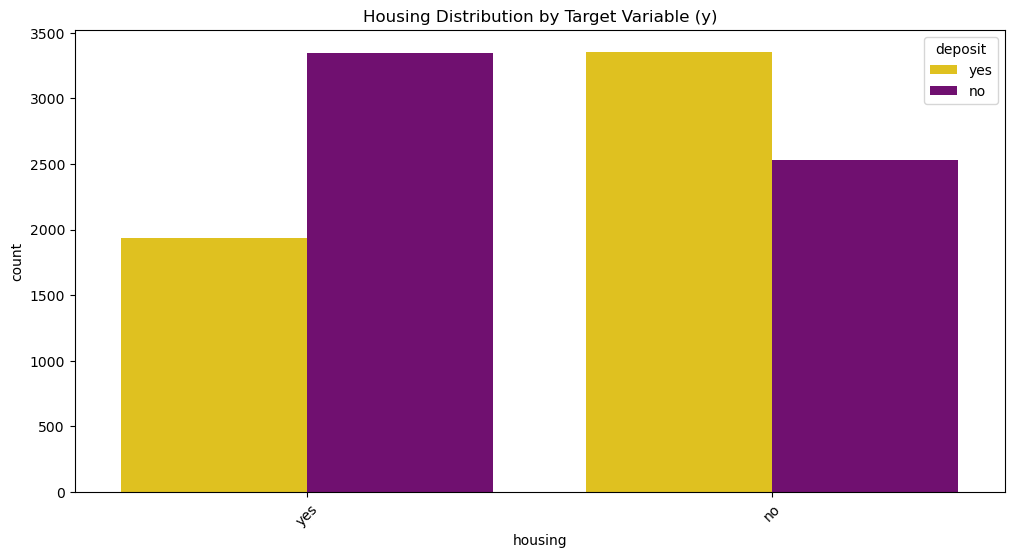

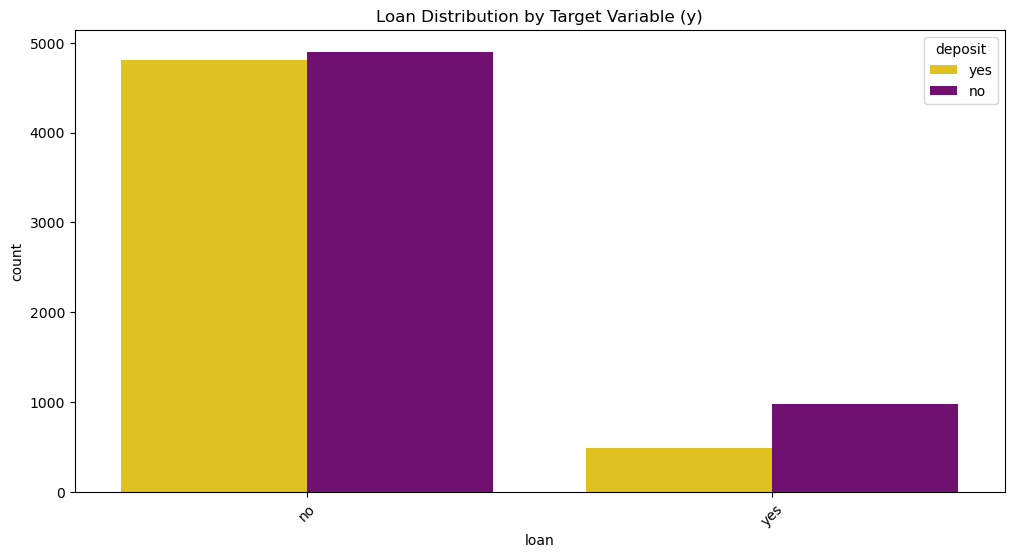

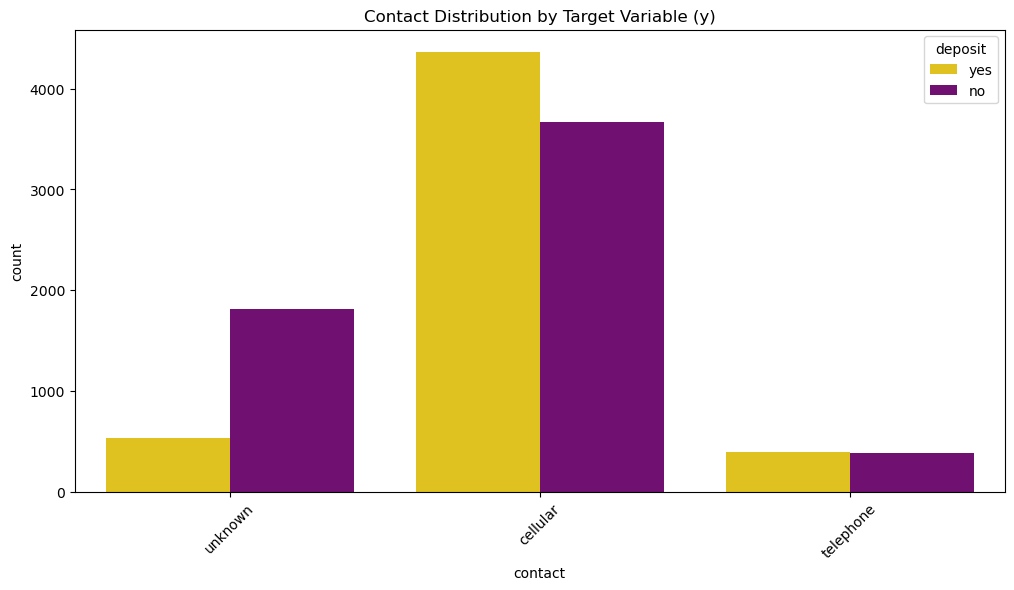

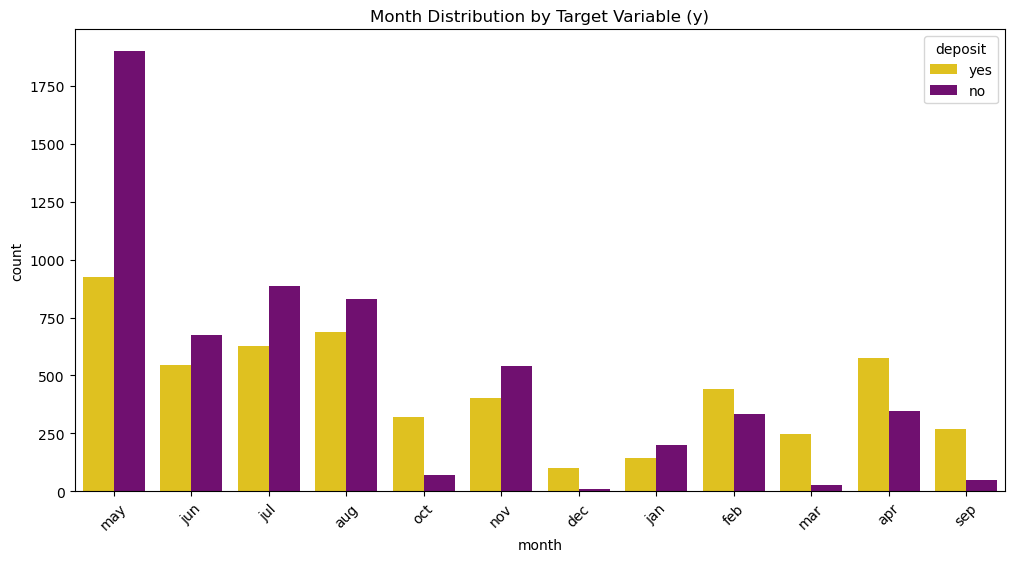

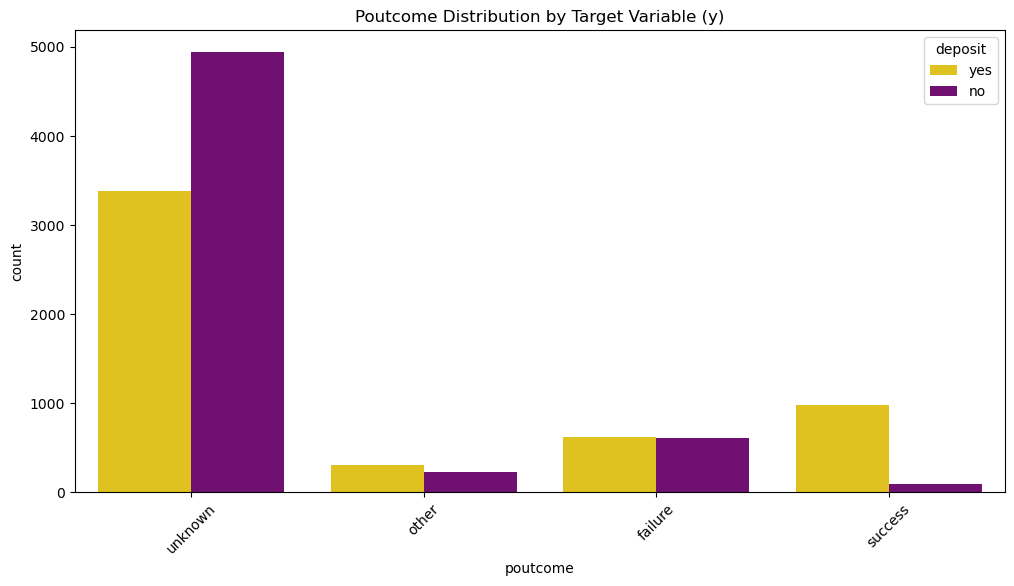

In [19]:
# Categorical_variables
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Define a custom palette (e.g., using hex color codes)
custom_palette = {"yes": "#FFD700", "no": "#800080"}

for feature in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='deposit', data=df, palette=custom_palette)
    plt.title(f"{feature.capitalize()} Distribution by Target Variable (y)")
    plt.xticks(rotation=45)
    plt.show()


<Figure size 1200x800 with 0 Axes>

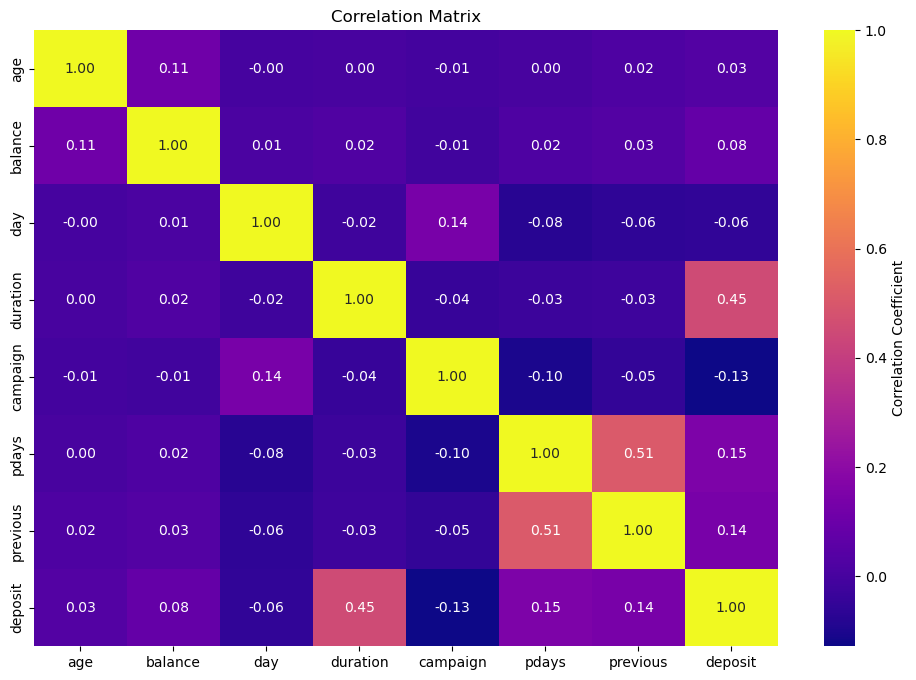

In [87]:
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

# Selecting only numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='age', ylabel='Density'>

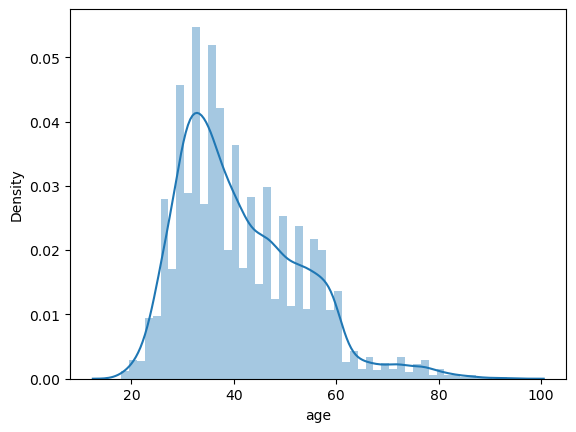

In [21]:
# Age distribution
sns.distplot(df['age'])

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Create a copy of the original dataframe
df_encoded = df.copy()

# Label Encoding for ordered or binary columns
label_columns = ['education', 'deposit', 'default', 'housing', 'loan', 'month']
for col in label_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encoding for unordered categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['job', 'marital', 'contact', 'poutcome'])

# Show the encoded dataframe
df_encoded.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,8,1042,1,...,False,True,False,False,False,True,False,False,False,True
1,56,1,0,45,0,0,5,8,1467,1,...,False,True,False,False,False,True,False,False,False,True
2,41,1,0,1270,1,0,5,8,1389,1,...,False,True,False,False,False,True,False,False,False,True
3,55,1,0,2476,1,0,5,8,579,1,...,False,True,False,False,False,True,False,False,False,True
4,54,2,0,184,0,0,5,8,673,2,...,False,True,False,False,False,True,False,False,False,True


In [23]:
# Convert boolean columns (True/False) to 1 and 0
df_encoded = df_encoded.astype(int)

# Show the encoded dataframe
df_encoded.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,8,1042,1,...,0,1,0,0,0,1,0,0,0,1
1,56,1,0,45,0,0,5,8,1467,1,...,0,1,0,0,0,1,0,0,0,1
2,41,1,0,1270,1,0,5,8,1389,1,...,0,1,0,0,0,1,0,0,0,1
3,55,1,0,2476,1,0,5,8,579,1,...,0,1,0,0,0,1,0,0,0,1
4,54,2,0,184,0,0,5,8,673,2,...,0,1,0,0,0,1,0,0,0,1


- In the above code, a copy of the original dataset is created to ensure that the original data remains unchanged during the encoding process. A list of categorical columns, including variables like 'job', 'marital', 'education', and others, is defined. For each of these columns, the LabelEncoder from scikit-learn is applied to transform the categorical values into numerical labels. 

In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11162 non-null  int32
 1   education          11162 non-null  int32
 2   default            11162 non-null  int32
 3   balance            11162 non-null  int32
 4   housing            11162 non-null  int32
 5   loan               11162 non-null  int32
 6   day                11162 non-null  int32
 7   month              11162 non-null  int32
 8   duration           11162 non-null  int32
 9   campaign           11162 non-null  int32
 10  pdays              11162 non-null  int32
 11  previous           11162 non-null  int32
 12  deposit            11162 non-null  int32
 13  job_admin.         11162 non-null  int32
 14  job_blue-collar    11162 non-null  int32
 15  job_entrepreneur   11162 non-null  int32
 16  job_housemaid      11162 non-null  int32
 17  job_manageme

#### Splitting the Dataset

In [27]:
# Split data into dependent/independent variables
X = df_encoded.drop(columns=['deposit']).values  
y = df_encoded['deposit'].values  

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Indices of numerical columns 
numerical_indices = [0, 3,6,9,10,11]  

# Scale only numerical columns
sc = StandardScaler()
X_train[:, numerical_indices] = sc.fit_transform(X_train[:, numerical_indices])
X_test[:, numerical_indices] = sc.transform(X_test[:, numerical_indices])

- Scaling is performed here. Scaling transforms the data so that each feature has a mean of 0 and a standard deviation of 1. Scaling is needed to standardize the range of features, ensuring that all features contribute equally to the model.

- If the data is not scaled, features with larger numerical ranges could disproportionately influence the model, leading to biased results. For example: variables with larger numerical ranges, such as balance (2343 in one row) or duration (1042 or 1467), will have a much greater influence on the model than variables with smaller ranges, such as age (59 or 56) or binary variables like housing (0 or 1). 

In [31]:
# Decision Tree Classification
# Define the parameters for Decision Tree Classifier
df_params = {'criterion': 'gini', 
             'max_depth': 10, 
             'max_features': None, 
             'min_samples_leaf': 4, 
             'min_samples_split': 10}

# Define the Decision Tree Classifier with specified parameters
classifier = DecisionTreeClassifier(**df_params, random_state=0)

#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=0)

- The code builds a Decision Tree model to predict customer behavior. It uses specific settings to control how the tree is created. For example, the tree can only grow up to 10 levels deep, which helps prevent the model from being too complex and memorizing the training data instead of learning general patterns.

-  Additionally, each decision in the tree must have at least 10 data points to split further, and every final decision (leaf) must represent at least 4 data points. These settings help the model make balanced and meaningful predictions.

In [33]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


- The code performs predictions on the test dataset using the trained Decision Tree model. The predicted values (y_pred) are compared with the actual target values (y_test) from the test set. These predictions and actual values are reshaped into column format and combined side by side into a single array using np.concatenate.

- This allows a direct comparison between the model's predictions and the true outcomes for evaluation purposes. Finally, the combined array is printed to show these side-by-side results.

In [35]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1175
           1       0.82      0.81      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



The classification report provides a summary of the model's performance across key metrics for each class (0: No Deposit, 1: Deposit):

- Precision: For class 0 (No Deposit), precision is 0.83, meaning 83% of predicted "No Deposit" cases are correct. For class 1 (Deposit), precision is 0.82, indicating 82% of "Deposit" predictions are correct.

- Recall: For class 0, recall is 0.84, meaning 84% of actual "No Deposit" cases were correctly identified. For class 1, recall is 0.81, meaning 81% of actual "Deposit" cases were correctly identified.

- F1-Score: A balance between precision and recall, showing the overall effectiveness for each class: 0.83 for class 0 and 0.81 for class 1.

- Support: The number of instances in each class: 1175 for class 0 and 1058 for class 1.

*Overall performance:*
- Accuracy: The model correctly predicted 82% of all cases.

- Macro Average: A simple average of precision, recall, and F1-score for both classes (0.82).

- Weighted Average: Accounts for class imbalance by weighting metrics based on the number of instances in each class (also 0.82).

*This report indicates the model performs similarly well for both classes, with slightly better precision for "No Deposit" and recall for "Deposit."*

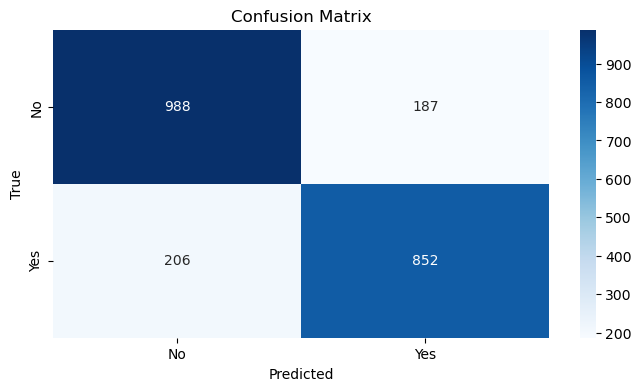

In [37]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- True Positives (TP): The model correctly predicted "Yes" (Deposit) for 852 instances.

- True Negatives (TN): The model correctly predicted "No" (No Deposit) for 988 instances.

- False Positives (FP): The model incorrectly predicted "Yes" (Deposit) for 187 instances where the true label was "No" (No Deposit).

- False Negatives (FN): The model incorrectly predicted "No" (No Deposit) for 206 instances where the true label was "Yes" (Deposit).

#### Exploring the Variables importance

In [39]:
# Extracting 
variable_importances = classifier.feature_importances_

# Creating a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Variable': df_encoded.columns[:-1],  
    'Importance': variable_importances
}).sort_values(by='Importance', ascending=False)

# Displaying variable importance
print(importance_df)


             Variable  Importance
8            duration    0.501694
32     poutcome_other    0.121110
7               month    0.117216
29  contact_telephone    0.095762
4             housing    0.048261
0                 age    0.020209
33   poutcome_success    0.019940
10              pdays    0.011634
6                 day    0.010204
1           education    0.008537
27     marital_single    0.004981
3             balance    0.004827
5                loan    0.004582
20       job_services    0.003692
16      job_housemaid    0.003623
12            deposit    0.003491
25   marital_divorced    0.003464
26    marital_married    0.003166
13         job_admin.    0.002733
21        job_student    0.002056
30    contact_unknown    0.001974
24        job_unknown    0.001638
17     job_management    0.001153
11           previous    0.001147
19  job_self-employed    0.000866
9            campaign    0.000701
28   contact_cellular    0.000535
31   poutcome_failure    0.000416
14    job_blue

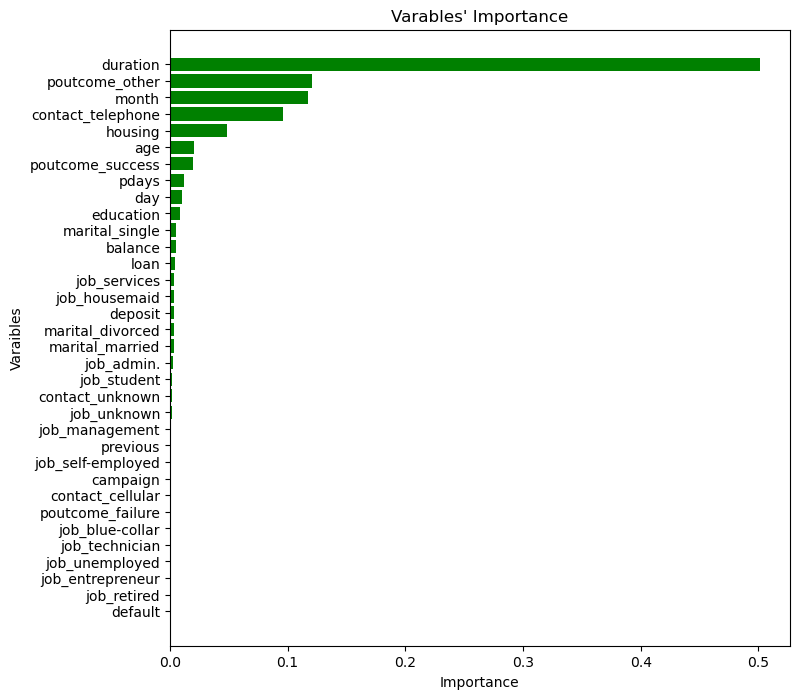

In [40]:
# Visualizing the variables importance
plt.figure(figsize=(8, 8))
plt.barh(importance_df['Variable'], importance_df['Importance'], color='green')
plt.gca().invert_yaxis() 
plt.title('Varables\' Importance')
plt.xlabel('Importance')
plt.ylabel('Varaibles')
plt.show()


- The variable importance values indicate how much each feature contributes to the decision tree model's predictions. The most influential feature is duration, which has the highest importance score and plays a significant role in determining whether a customer will make a deposit.

- On the other hand, default and loan are the least significant features, with minimal influence on the model's output.

- This ranking of variable importance helps in understanding the key drivers of the model's predictions and can guide future efforts in model optimization or feature selection.

#### Cross-Validation

In [43]:
# List of metrics to evaluate
metrics = ['accuracy', 'f1', 'precision', 'recall']

# Dictionary to store results
cv_results = {}

# Perform cross-validation for each metric
for metric in metrics:
    cv_scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring=metric)
    cv_results[metric] = {
        'Scores': cv_scores,
        'Mean': cv_scores.mean(),
        'Std': cv_scores.std()
    }
    print(f"\nMetric: {metric.capitalize()}")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean {metric.capitalize()}: {cv_scores.mean():.2f}")
    print(f"Standard Deviation: {cv_scores.std():.2f}")


Metric: Accuracy
Cross-Validation Scores: [0.80683091 0.79619261 0.82138858 0.81410974 0.81288515]
Mean Accuracy: 0.81
Standard Deviation: 0.01

Metric: F1
Cross-Validation Scores: [0.79549496 0.77912621 0.80886759 0.80214541 0.80166271]
Mean F1: 0.80
Standard Deviation: 0.01

Metric: Precision
Cross-Validation Scores: [0.79785969 0.80049875 0.82017011 0.80986763 0.80548926]
Mean Precision: 0.81
Standard Deviation: 0.01

Metric: Recall
Cross-Validation Scores: [0.79314421 0.75886525 0.79787234 0.79456907 0.79787234]
Mean Recall: 0.79
Standard Deviation: 0.01


### *Accuracy*
- Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made.- 
The mean accuracy of 0.81 indicates that the model correctly predicts the outcome approximately 81% of the time across the five cross-validation folds.
- 
The standard deviation of 0.01 suggests that the accuracy is quite stable across different folds, with minimal variation (indicating consistent performance

### *F1 Score*
- The F1 score is the harmonic mean of precision and recall and provides a balance between the two metrics, particularly useful for imbalanced datasets.- 
A mean F1 score of 0810 indicates a good balance between precision and recall, suggesting that the model performs well in identifying positive instances while minimizing false positives and false negatives.
- 
The standard deviation of 0.01 again indicates consistent performance across different fold

### *Precision*
- Precision measures the proportion of true positive predictions among all positive predictions made by the model.- 
A mean precision of 8179 means that when the model predicts a positive class, it is correct abou8179% of the time.
- 
The standard deviation of 1.00 indicates that precision comsistentble across different folds, showing little to no variat.
ion
### *Recall*
- Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive instances that were correctly identified by the model.- 
A mean recall of79.81 indicates that approximate79 81% of actual positive cases were correctly predicted as positive by the model.
- 
The standard deviation of10.01 suggests consistent performance in terms of recall across different folds..
s.).

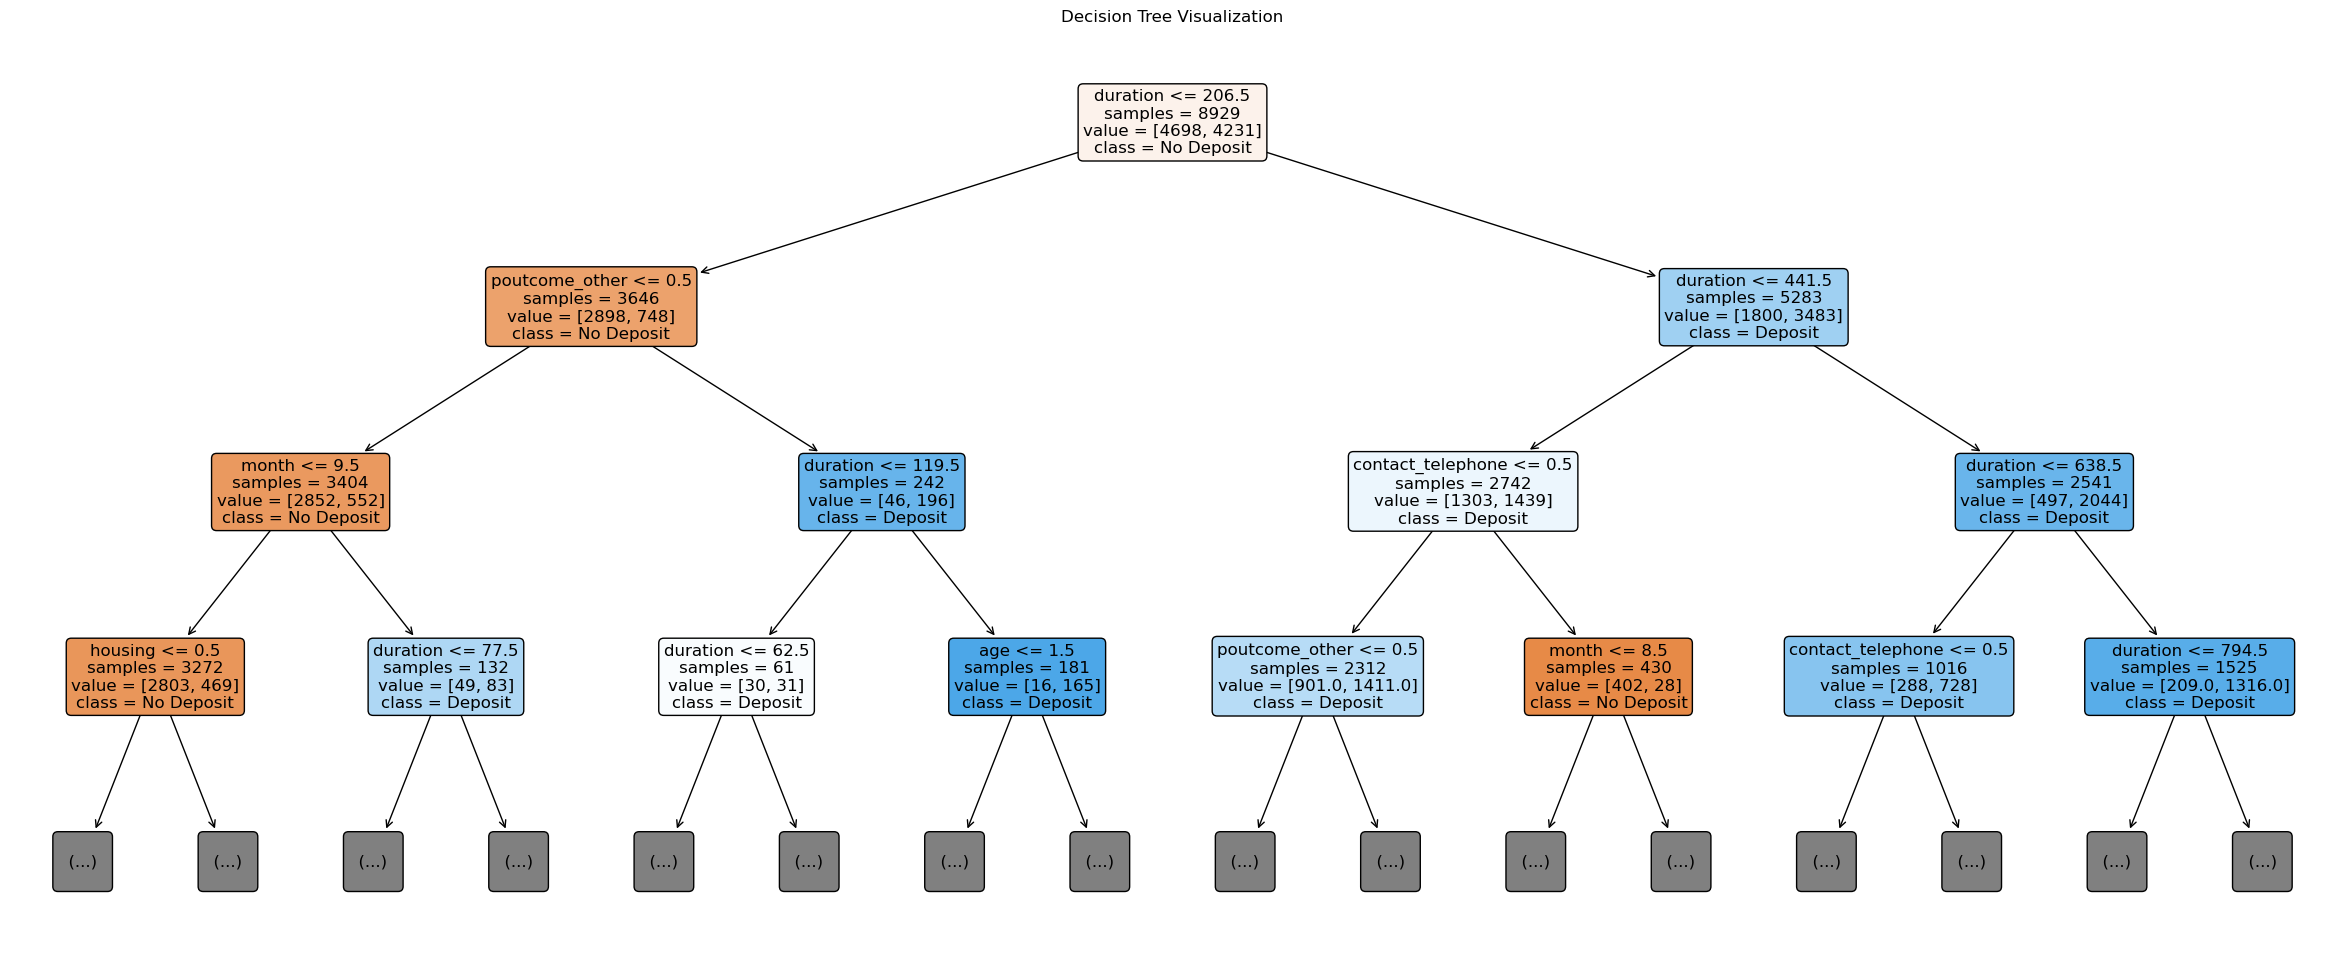

In [45]:
from sklearn.tree import plot_tree

# Visualizing the decision tree
plt.figure(figsize=(30, 12))
plot_tree(classifier, feature_names=df_encoded.columns, class_names=['No Deposit', 'Deposit'], max_depth=3, filled=True, proportion=False, impurity=False, label='all', rounded=True, fontsize=12)

plt.title("Decision Tree Visualization")
plt.show()


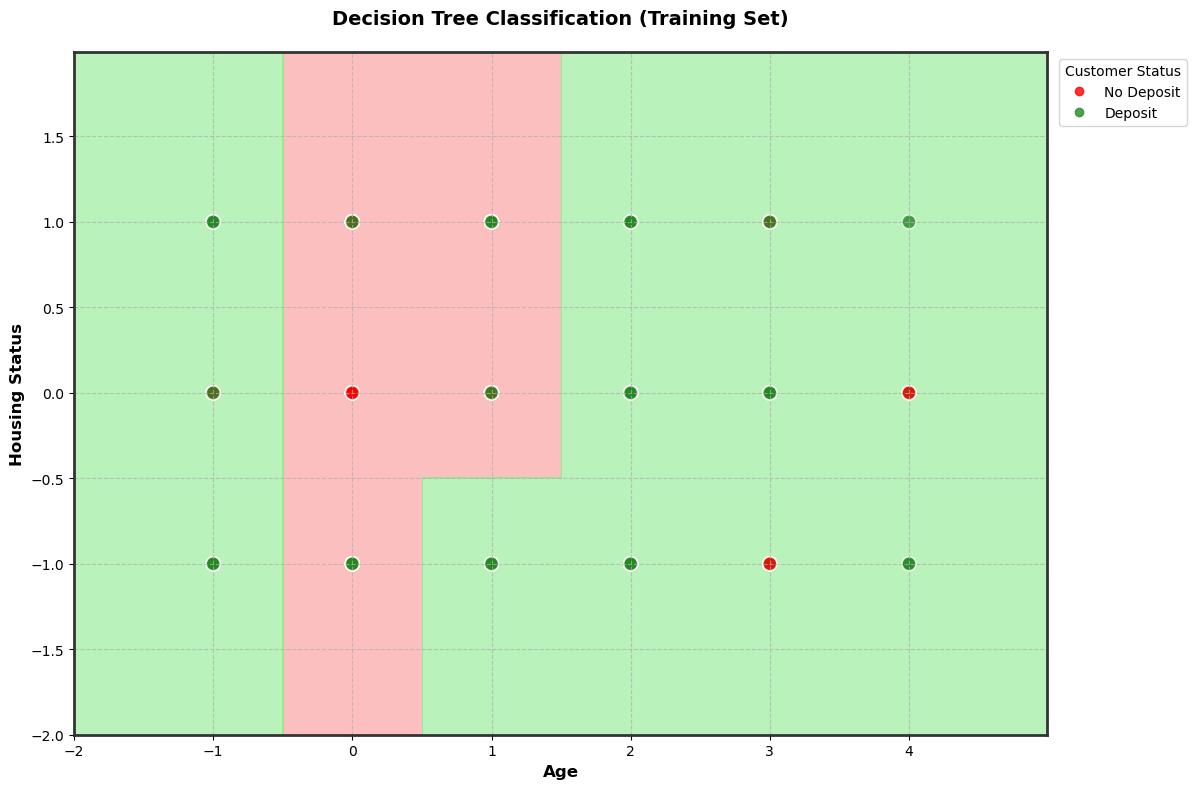

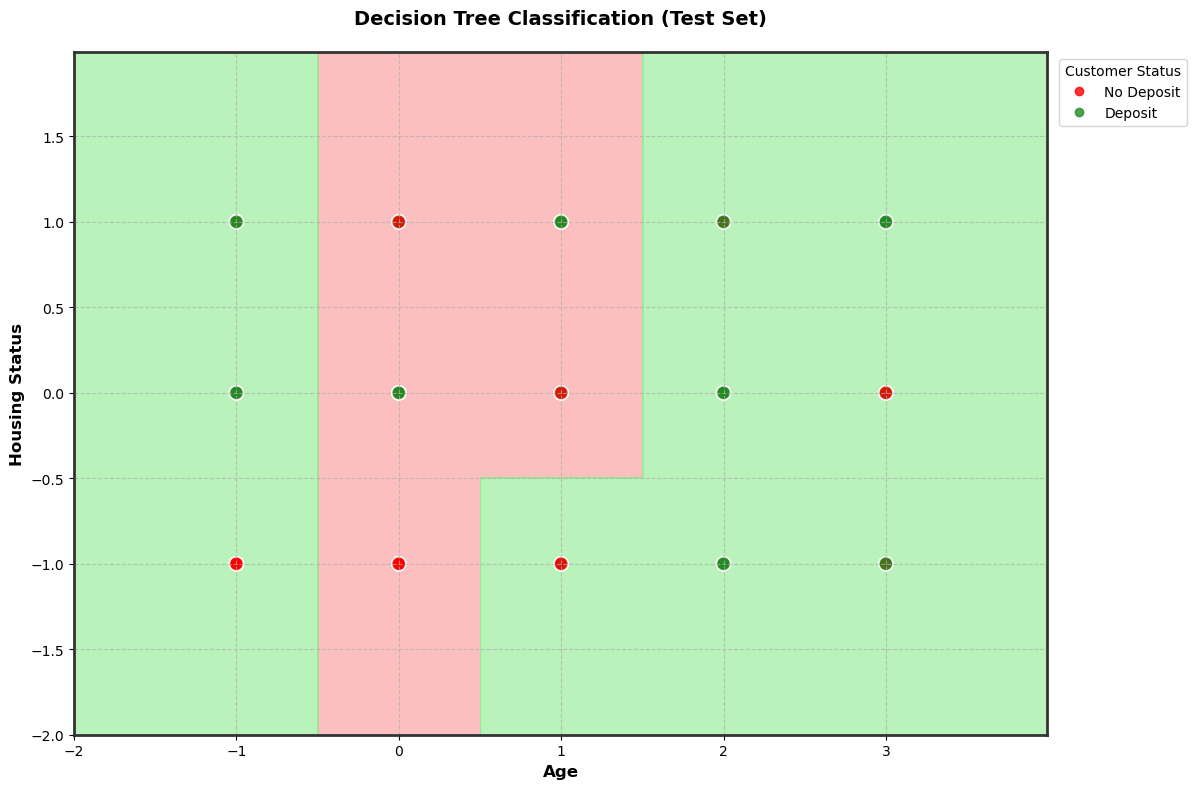

In [46]:
from matplotlib.colors import ListedColormap

# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title, is_training=True):
    # Set up the figure with a modern style
    plt.figure(figsize=(12, 8))
    
    # Create meshgrid with smaller step for smoother boundaries
    X1, X2 = np.meshgrid(
        np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.005),
        np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.005)
    )
    
    # Create the decision boundary
    Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)
    
    # Define custom colors
    custom_cmap = ListedColormap(['#FF9999', '#90EE90'])  
    custom_scatter_cmap = ListedColormap(['#FF0000', '#228B22']) 
    
    # Plot the decision boundary
    plt.contourf(X1, X2, Z, alpha=0.6, cmap=custom_cmap)
    
    # Plot the points with enhanced styling
    scatter = plt.scatter(X[:, 0], X[:, 1], 
                         c=y,
                         cmap=custom_scatter_cmap,
                         edgecolor='white',
                         s=100,  
                         linewidth=1,
                         alpha=0.8)
    
    # Add legend
    plt.legend(handles=scatter.legend_elements()[0], 
              labels=['No Deposit', 'Deposit'],
              title="Customer Status",
              loc="upper right",
              bbox_to_anchor=(1.15, 1))
    
    # Customize the plot
    plt.title(title, pad=20, size=14, weight='bold')
    plt.xlabel('Age', size=12, weight='bold')
    plt.ylabel('Housing Status', size=12, weight='bold')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set background color
    plt.gca().set_facecolor('#f8f9fa')
    
    # Add a box around the plot
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)
        spine.set_color('#333333')
    
    # Adjust layout
    plt.tight_layout()
    
    return plt

# Select two features ( 'Age' and 'Housing') 
X_train_2D = X_train[:, [0, 6]]  # Age (index 0) and Housing (index 6)
X_test_2D = X_test[:, [0, 6]]    


# Train the classifier
classifier.fit(X_train_2D, y_train)

# Plot training set decision boundary
plot_training = plot_decision_boundary(X_train_2D, y_train, classifier, 
                                       'Decision Tree Classification (Training Set)')
plot_training.show()

# Plot test set decision boundary
plot_test = plot_decision_boundary(X_test_2D, y_test, classifier, 
                                   'Decision Tree Classification (Test Set)')
plot_test.show()


The plots above show how my machine learning model makes decisions about whether a bank customer will make a deposit or not. Think of it like a map where the x-axis shows customer age and the y-axis shows their housing status. The colored backgrounds work like a territory map: pink areas are where the model predicts "No Deposit," and green areas are where it predicts "Deposit." The dots represent actual customers - red dots for customers who didn't make deposits and green dots for those who did.

I have created two maps: one for training data (what the model learned from) and one for testing data (new cases it hadn't seen before). The rectangular patterns you see are like decision rules - for example, "if a customer is this age AND has this housing status, they're likely to make a deposit." When you see a red dot in a pink area or a green dot in a green area, that means our model made the right prediction. Dots in the wrong colored areas show where my model made mistakes.

What makes these visualizations valuable is that they show how well my model is working. The similar patterns between training and test sets tell us the model has learned genuine patterns rather than just memorizing data. We can also see that age seems to play a big role in deposit decisions (shown by the many vertical lines), and that older customers (right side) are generally more likely to make deposits (more green areas). This kind of visualization helps banks understand their customers better and make more informed decisions about their services.